In [2]:
using DataFrames, Plots, Dates;
import CSV;

filepath = "jc_data.csv"

df = CSV.read(filepath, DataFrame)
describe(df)


Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,ride_id,,000014C0F3864E1D,,FFFFF934ADE6E60A,0,String31
2,rideable_type,,classic_bike,,electric_bike,0,String15
3,started_at,,2022-01-01 00:10:20,,2024-11-30 23:57:23.726,0,String31
4,ended_at,,2022-01-01 00:14:06,,2024-11-30 23:59:45.683,0,String31
5,start_station_name,,1 Ave & E 30 St,,York St & Marin Blvd,199,"Union{Missing, String}"
6,start_station_id,,3132.09,,MTL-ECO5-LAB,199,"Union{Missing, String15}"
7,end_station_name,,1 Ave & E 16 St,,York St & Marin Blvd,9073,"Union{Missing, String}"
8,end_station_id,,2733.03,,Shop Morgan,9308,"Union{Missing, String15}"
9,start_lat,40.7323,40.6783,40.7352,40.8639,0,Float64


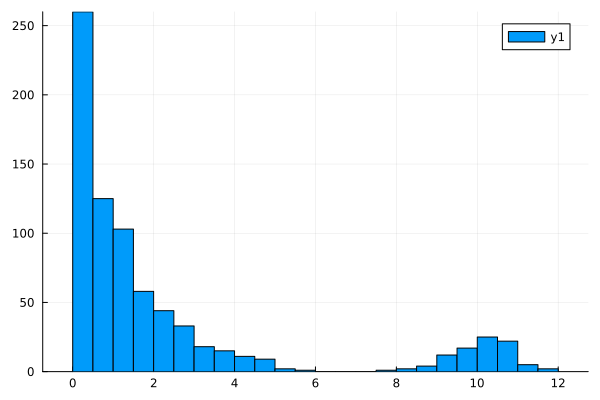

In [3]:
histogram(log.(combine(groupby(df, [:end_station_id]), nrow => :count)[!, "count"]), bins=30)

In [4]:
df = transform(df, :ended_at => (t -> DateTime.(t, "yyy-mm-dd HH:MM:SS.s")) => :ended_at)
df = transform(df, :ended_at => (t -> Date.(t)) => :ended_at_date)
# transform(df, :ended_at => (t -> Date.(t)) => :ended_at_date)

Row,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ended_at_date
,String31,String15,String31,DateTime,String?,String15?,String?,String15?,Float64,Float64,Float64?,Float64?,String7,Date
1,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26T18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.7506,-74.024,40.7506,-74.024,member,2022-01-26
2,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28T13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.7128,-74.0365,40.7128,-74.0365,member,2022-01-28
3,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10T20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.7128,-74.0365,40.7128,-74.0365,member,2022-01-10
4,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26T07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.7506,-74.024,40.7506,-74.024,member,2022-01-26
5,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13T18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.7506,-74.024,40.7506,-74.024,member,2022-01-13
6,5E7C60D8C322436D,classic_bike,2022-01-13 18:46:20,2022-01-13T19:17:32,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.7506,-74.024,40.7506,-74.024,member,2022-01-13
7,20F859440531F682,classic_bike,2022-01-06 13:25:34,2022-01-06T14:22:48,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.7506,-74.024,40.7506,-74.024,casual,2022-01-06
8,1D3BB04281B26554,classic_bike,2022-01-16 16:41:23,2022-01-16T17:56:50,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.7506,-74.024,40.7506,-74.024,member,2022-01-16
9,B66A3E56C3986AD1,electric_bike,2022-01-07 16:31:32,2022-01-07T16:46:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.7506,-74.024,40.7506,-74.024,member,2022-01-07


In [5]:
rides_dt = sort(combine(groupby(df, [:ended_at_date]), nrow => :rides))

Row,ended_at_date,rides
,Date,Int64
1,2022-01-01,580
2,2022-01-02,1246
3,2022-01-03,833
4,2022-01-04,939
5,2022-01-05,919
6,2022-01-06,1291
7,2022-01-07,456
8,2022-01-08,690
9,2022-01-09,650


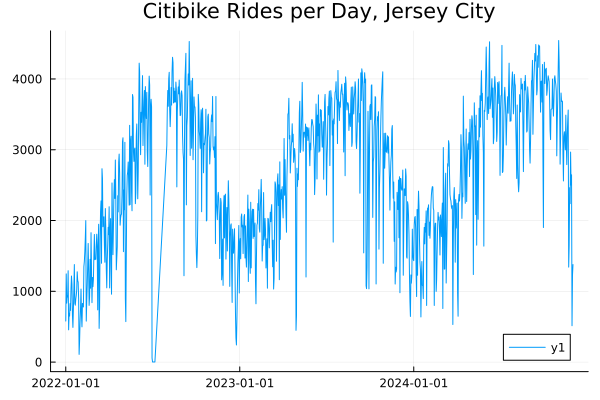

In [7]:
plot(rides_dt.ended_at_date, rides_dt.rides, title = "Citibike Rides per Day, Jersey City")